In [2]:
import pandas as pd

# Read the cargo TSV file
cargo_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_cargo.tsv', sep='\t', skiprows=1)

# Display the initial DataFrame and its data types
print("Initial DataFrame:")
print(cargo_data)
print("Initial data types:")
print(cargo_data.dtypes)

# Convert columns to nullable integer types
# List of columns to convert
columns_to_convert = ['carProductId','carSpecificationId','carUnit', 'carValueGuldens','carValueStuivers','carValuePenningen', 'carValueLichtGuldens', 'carValueLichtStuivers','carValueLichtPenningen', 'carOrder']

for col in columns_to_convert:
    cargo_data[col] = cargo_data[col].astype('Int64')

    
# Display the updated DataFrame and its data types
print("\nUpdated DataFrame:")
print(cargo_data)
print("Updated data types:")
print(cargo_data.dtypes)

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/1230793606.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  cargo_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_cargo.tsv', sep='\t', skiprows=1)


Initial DataFrame:
         carId carVoyageId  carProductId  carSpecificationId  carUnit  \
0       645880       99353        1290.0                 NaN      NaN   
1       645881       99353        1230.0               848.0     88.0   
2       645877       99353        1133.0             16295.0     88.0   
3       645878       99353        1133.0               848.0     88.0   
4       645879       99353        1157.0                 NaN     88.0   
...        ...         ...           ...                 ...      ...   
253385  903925      117548        1290.0                 NaN     69.0   
253386  903928      117422        1290.0                 NaN     69.0   
253387  903927      117422        2364.0              2744.0      NaN   
253388  903929      113648        2364.0              2744.0      NaN   
253389  903930      113648        1290.0                 NaN     69.0   

       carQuantity carQuantityNumeric  carValue  carValueGuldens  \
0              NaN                Na

In [3]:
cargo_data.head()

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,carValueLicht,carValueLichtGuldens,carValueLichtStuivers,carValueLichtPenningen,carRemarks,carOrder,changed_when,changed_by,timestamp,all_fields
0,645880,99353,1290,<NA>,<NA>,NaN,NaN,"1.623,30",1623,3,...,NaN,<NA>,<NA>,<NA>,NaN,9,6/25/08 12:42,jsc,8/5/13 10:50,samen
1,645881,99353,1230,848,88,4,4,"371,8",371,8,...,NaN,<NA>,<NA>,<NA>,NaN,10,5/21/08 14:41,mjo,8/5/13 10:50,"zakhorloge zilveren, voor Japan pees"
2,645877,99353,1133,16295,88,4,4,NaN,<NA>,<NA>,...,NaN,<NA>,<NA>,<NA>,NaN,7,2/25/13 10:09,DorineS,8/5/13 10:50,"moir√© gouden, voor Japan pees"
3,645878,99353,1133,848,88,6,6,NaN,<NA>,<NA>,...,NaN,<NA>,<NA>,<NA>,NaN,8,2/25/13 10:09,DorineS,8/5/13 10:50,"moir√© zilveren, voor Japan pees"
4,645879,99353,1157,<NA>,88,65,65,"1.487,17",1487,17,...,NaN,<NA>,<NA>,<NA>,NaN,11,6/9/08 9:04,mjo,8/5/13 10:50,perpetuanen pees


In [31]:
# Drop columns that are not needed for analysis
columns_to_drop = ['carRemarks','carOrder', 'changed_when', 'changed_by', 'timestamp']
cargo_data = cargo_data.drop(columns=columns_to_drop)

In [32]:
cargo_data.head()

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,carValuePenningen,carValueLicht,carValueLichtGuldens,carValueLichtStuivers,carValueLichtPenningen,all_fields
0,645880,99353,1290,<NA>,<NA>,NaN,NaN,"1.623,30",1623,3,<NA>,NaN,<NA>,<NA>,<NA>,samen
1,645881,99353,1230,848,88,4,4,"371,8",371,8,<NA>,NaN,<NA>,<NA>,<NA>,"zakhorloge zilveren, voor Japan pees"
2,645877,99353,1133,16295,88,4,4,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,"moir√© gouden, voor Japan pees"
3,645878,99353,1133,848,88,6,6,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,"moir√© zilveren, voor Japan pees"
4,645879,99353,1157,<NA>,88,65,65,"1.487,17",1487,17,<NA>,NaN,<NA>,<NA>,<NA>,perpetuanen pees


In [28]:
# Read the voyage TSV file
voyage_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_voyage.tsv', sep='\t', skiprows=1)

# Display the initial DataFrame and its data types
print("DataFrame:")
print(voyage_data)
print("data types:")
print(voyage_data.dtypes)

DataFrame:
                                                url   voyId  voyBookingDay  \
0          https://bgb.huygens.knaw.nl/bgb/voyage/1   99351            NaN   
1          https://bgb.huygens.knaw.nl/bgb/voyage/2   99352            NaN   
2          https://bgb.huygens.knaw.nl/bgb/voyage/3   99353            NaN   
3          https://bgb.huygens.knaw.nl/bgb/voyage/4   99354            NaN   
4          https://bgb.huygens.knaw.nl/bgb/voyage/5   99355            NaN   
...                                             ...     ...            ...   
18317  https://bgb.huygens.knaw.nl/bgb/voyage/18813  118272            NaN   
18318  https://bgb.huygens.knaw.nl/bgb/voyage/18814  118273            NaN   
18319  https://bgb.huygens.knaw.nl/bgb/voyage/18815  118274            NaN   
18320  https://bgb.huygens.knaw.nl/bgb/voyage/18816  118276            NaN   
18321  https://bgb.huygens.knaw.nl/bgb/voyage/18817  118277            NaN   

       voyBookingMonth  voyBookingYear  voyDeparture

In [33]:
# Drop columns that are not needed for analysis
columns_to_drop = ['voyRemarksForEditor', 'created_when', 'created_by', 'changed_when', 'changed_by', 'timestamp']
voyage_data = voyage_data.drop(columns=columns_to_drop)

In [34]:
# merge bgb_cargo.tsv with bgb_voyage.tsv
cargo_voyage_data = pd.merge(cargo_data, voyage_data, left_on='carVoyageId', right_on='voyId')
len(cargo_voyage_data)

220621

In [35]:
cargo_voyage_data

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
0,645880,99353,1290,<NA>,<NA>,NaN,NaN,"1.623,30",1623,3,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
1,645881,99353,1230,848,88,4,4,"371,8",371,8,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
2,645877,99353,1133,16295,88,4,4,NaN,<NA>,<NA>,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
3,645878,99353,1133,848,88,6,6,NaN,<NA>,<NA>,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
4,645879,99353,1157,<NA>,88,65,65,"1.487,17",1487,17,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220616,903794,105466,1290,<NA>,88,400,400,NaN,<NA>,<NA>,...,NaN,131.0,6080,NaN,NaN,3129,3169,159,6080 Timor Batavia Batavia 1762 1762 159 H...,Hercules
220617,903821,103465,1676,1484,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,95083.0,136.0,4083,NaN,NaN,3185,3059,206,4083 Kaap de Goede Hoop Kaap de Goede Hoop Ams...,Ouderamstel
220618,903822,103465,1290,<NA>,88,100,100,"160,13",160,13,...,95083.0,136.0,4083,NaN,NaN,3185,3059,206,4083 Kaap de Goede Hoop Kaap de Goede Hoop Ams...,Ouderamstel
220619,903827,103471,1757,1484,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,95016.0,135.0,4089,NaN,NaN,3185,3059,183,4089 Kaap de Goede Hoop Kaap de Goede Hoop Ams...,Huis ten Donk


In [36]:
# find opium
# according to "bgb_product.tsv", carProductId for opium is 1142
cargo_voyage_data['carProductId'] = cargo_voyage_data['carProductId'].astype(str)
opium=cargo_voyage_data.loc[cargo_voyage_data['carProductId'] == '1142']
opium

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
979,646738,99404,1142,781,69,4.359,4359,"21.075,7,8",21075,7,...,95395.0,148.0,50,NaN,NaN,3185,3129,3,50 Batavia Batavia Amsterdam Republiek 1780 ...,Overduin
1103,646807,99410,1142,781,69,1.920,1920,"9.279,50",9279,5,...,95397.0,148.0,56,NaN,NaN,3185,3129,3,56 Batavia Batavia Amsterdam Republiek 1780 ...,Willem Frederik
1315,646995,99425,1142,659,67,500,500,"0,0,0",0,0,...,NaN,147.0,71,NaN,NaN,3106,3129,24,71 Batavia Batavia Bengalen 1790 1790 24 S...,Stralen
1605,647332,99449,1142,659,69,12.300,12300,"499.631,17,8",499631,17,...,NaN,148.0,96,NaN,NaN,3106,3129,37,96 Batavia Batavia Bengalen 1780 1780 37 D...,Dankbaarheid
4625,649969,99730,1142,659,67,347,347,"218.421,15",218421,15,...,NaN,146.0,506,NaN,NaN,3106,3129,32,506 Batavia Batavia Bengalen 1787 1787 32 ...,Standvastigheid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214367,894901,117790,1142,<NA>,69,50.818,50818,NaN,<NA>,<NA>,...,NaN,113.0,18364,NaN,NaN,3106,3129,74,18364 Batavia Batavia Bengalen 1729 1729 74...,Meerhuizen
214394,894929,117791,1142,<NA>,257,535xx,NaN,NaN,<NA>,<NA>,...,NaN,113.0,18365,NaN,NaN,3106,3129,75,18365 Batavia Batavia Bengalen 1729 1729 75...,Petronella Alida
214423,894960,117792,1142,<NA>,69,26.100,26100,NaN,<NA>,<NA>,...,NaN,113.0,18366,NaN,NaN,3106,3129,76,18366 Batavia Batavia Bengalen 1729 1729 76...,'s Heer Arendskerke
214454,894991,117793,1142,<NA>,69,29.000,29000,NaN,<NA>,<NA>,...,NaN,113.0,18367,NaN,NaN,3106,3129,76,18367 Batavia Batavia Bengalen 1729 1729 76...,Bentveld


In [70]:
# Export the DataFrame to a CSV file for further analysis
opium.to_csv('opium.csv', index=False)

In [37]:
# Unique number of values 
opium.nunique()

carId                     198
carVoyageId               198
carProductId                1
carSpecificationId         23
carUnit                     4
carQuantity               133
carQuantityNumeric        132
carValue                   30
carValueGuldens            30
carValueStuivers           16
carValuePenningen           2
carValueLicht             159
carValueLichtGuldens      153
carValueLichtStuivers      20
carValueLichtPenningen      2
all_fields_x               29
url                       198
voyId                     198
voyBookingDay               0
voyBookingMonth             0
voyBookingYear             44
voyDeparturePlaceId         5
voyDepartureDay            24
voyDepartureMonth          12
voyDepartureYear           36
voyArrivalPlaceId          13
voyArrivalDay              31
voyArrivalMonth            10
voyArrivalYear             46
voyInvoiceValue            30
voyInvoiceValueLicht      168
voyageDAS                   4
voySourceId                44
voynumber 

In [18]:
opium['carUnit'].describe()

count    234.000000
mean      69.764957
std       12.519525
min       67.000000
25%       69.000000
50%       69.000000
75%       69.000000
max      257.000000
Name: carUnit, dtype: float64

In [49]:
# Read the unit TSV file
unit_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_unit.tsv', sep='\t', skiprows=1)

# Display the initial DataFrame and its data types
print("DataFrame:")
print(unit_data)
print("data types:")
print(unit_data.dtypes)

DataFrame:
      id          naam     added_when   added_by      timestamp
0     88          pees  5/21/08 10:03        jsc  5/21/08 10:03
1     52           aam   4/9/08 16:38      Admin   4/9/08 16:39
2     54         balie   4/9/08 16:38      Admin   4/9/08 16:39
3     55          blad   4/9/08 16:38      Admin   4/9/08 16:39
4     56           bos   4/9/08 16:38      Admin  3/12/13 16:13
..   ...           ...            ...        ...            ...
157  271          zeem  5/15/13 13:13  NicolienK  5/15/13 13:13
158  273        salder  5/28/13 12:36  NicolienK  5/28/13 12:36
159  275   hele sokkel  6/14/13 15:18  NicolienK  6/14/13 15:18
160  276  halve sokkel  6/14/13 15:18  NicolienK  6/14/13 15:18
161  277          klos  6/28/13 12:47    SanderT  6/28/13 12:47

[162 rows x 5 columns]
data types:
id             int64
naam          object
added_when    object
added_by      object
timestamp     object
dtype: object


In [51]:
# merge bgb_unit.tsv with bgb_voyage.tsv
opium_unit_data = pd.merge(opium, unit_data, left_on='carUnit', right_on='id')

# Drop columns that are not needed for analysis
columns_to_drop = ['added_when', 'added_by', 'timestamp']
opium_unit_data = opium_unit_data.drop(columns=columns_to_drop)

opium_unit_data

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name,id,naam
0,646738,99404,1142,781,69,4.359,4359,"21.075,7,8",21075,7,...,50,NaN,NaN,3185,3129,3,50 Batavia Batavia Amsterdam Republiek 1780 ...,Overduin,69,lb
1,646807,99410,1142,781,69,1.920,1920,"9.279,50",9279,5,...,56,NaN,NaN,3185,3129,3,56 Batavia Batavia Amsterdam Republiek 1780 ...,Willem Frederik,69,lb
2,647332,99449,1142,659,69,12.300,12300,"499.631,17,8",499631,17,...,96,NaN,NaN,3106,3129,37,96 Batavia Batavia Bengalen 1780 1780 37 D...,Dankbaarheid,69,lb
3,663416,101181,1142,781,69,1.319,1319,"6.117,19",6117,19,...,1801,NaN,NaN,3185,3129,5,1801 Batavia Batavia Amsterdam Republiek 1778...,Triton,69,lb
4,659553,100763,1142,<NA>,69,52.950,52950,"198.638,10",198638,1,...,1384,NaN,NaN,3106,3129,202,1384 Batavia Batavia Bengalen 1787 1787 202...,Rotterdams Welvaren,69,lb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,842371,115232,1142,10398,67,10,10,NaN,<NA>,<NA>,...,15811,NaN,NaN,3129,3133,149,15811 Java's Noordoostkust Batavia Batavia ...,Reigersdaal,67,kist
194,842800,115246,1142,<NA>,67,10,10,NaN,<NA>,<NA>,...,15825,NaN,NaN,3129,3130,153,15825 Cheribon Cheribon Batavia Batavia 1706...,Bombardeerder,67,kist
195,876404,116885,1142,<NA>,67,322,322,NaN,<NA>,<NA>,...,17463,NaN,NaN,3106,3129,37,17463 Batavia Batavia Bengalen 1727 1727 37...,Cats,67,kist
196,811018,113709,1142,20976,104,10,10,NaN,<NA>,<NA>,...,14301,NaN,"Due to smudged ink and ink corrosion, many of ...",3129,3145,174,14301 Ternate Ternate Batavia Batavia Due to s...,Hof van Ilpendam,104,kati


In [27]:
# how many units are there to meadsure opium? 
opium['carUnit'].value_counts()

69     210
67      22
104      1
257      1
Name: carUnit, dtype: Int64

In [19]:
opium['carQuantityNumeric'].describe()

count     233
unique    153
top       150
freq        9
Name: carQuantityNumeric, dtype: object

In [20]:
opium['carValueGuldens'].describe()

count        38.000000
mean     118649.578947
std      152354.844653
min           0.000000
25%        1143.750000
50%       13829.500000
75%      230028.750000
max      499631.000000
Name: carValueGuldens, dtype: float64

In [40]:
# we need to ask some expert to know what "booking year" here means
# my assumption is the year when this opium voyage was booked by the Company? 
opium['voyBookingYear'].describe()

count     198.000000
mean     1733.979798
std        26.050704
min      1701.000000
25%      1709.000000
50%      1732.000000
75%      1753.000000
max      1790.000000
Name: voyBookingYear, dtype: float64

In [42]:
# where did opium voyage depart from? 
opium['voyDeparturePlaceId'].value_counts()

861.0    42
929.0     9
934.0     4
847.0     1
927.0     1
Name: voyDeparturePlaceId, dtype: int64

In [44]:
# when did opium voyage depart? 
opium['voyDepartureYear'].describe()

count      57.000000
mean     1736.473684
std        26.471754
min      1700.000000
25%      1708.000000
50%      1739.000000
75%      1754.000000
max      1787.000000
Name: voyDepartureYear, dtype: float64

In [45]:
# where did opium voyage arrive in? 
opium['voyArrivalPlaceId'].value_counts()

861.0    149
927.0      6
877.0      6
866.0      4
850.0      4
865.0      2
862.0      2
926.0      1
837.0      1
847.0      1
851.0      1
815.0      1
867.0      1
Name: voyArrivalPlaceId, dtype: int64

In [46]:
# when did opium voyage arrive? 
opium['voyArrivalYear'].describe()

count     140.000000
mean     1732.942857
std        26.047486
min      1700.000000
25%      1707.000000
50%      1731.000000
75%      1753.000000
max      1790.000000
Name: voyArrivalYear, dtype: float64

In [47]:
# which regions did opium voyage depart from? 
opium['voyDepartureRegioId'].value_counts()

3106    147
3129     42
3185      4
3076      2
3115      1
3063      1
3082      1
Name: voyDepartureRegioId, dtype: int64

In [48]:
# which regions did opium voyage arrive in? 
opium['voyArrivalRegioId'].value_counts()

3129    149
3082     20
3133      9
3145      6
3118      4
3093      2
3076      2
3130      2
3120      1
3106      1
3115      1
3119      1
Name: voyArrivalRegioId, dtype: int64

In [54]:
# calculate unit price for opium (per lb)
opium['carUnit'] = opium['carUnit'].astype(str)
opium_lb=opium.loc[opium['carUnit'] == '69']
opium_lb

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/4040909731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opium['carUnit'] = opium['carUnit'].astype(str)


,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
979,646738,99404,1142,781,69,4.359,4359,"21.075,7,8",21075,7,...,95395.0,148.0,50,NaN,NaN,3185,3129,3,50 Batavia Batavia Amsterdam Republiek 1780 ...,Overduin
1103,646807,99410,1142,781,69,1.920,1920,"9.279,50",9279,5,...,95397.0,148.0,56,NaN,NaN,3185,3129,3,56 Batavia Batavia Amsterdam Republiek 1780 ...,Willem Frederik
1605,647332,99449,1142,659,69,12.300,12300,"499.631,17,8",499631,17,...,NaN,148.0,96,NaN,NaN,3106,3129,37,96 Batavia Batavia Bengalen 1780 1780 37 D...,Dankbaarheid
7497,663416,101181,1142,781,69,1.319,1319,"6.117,19",6117,19,...,95362.0,141.0,1801,NaN,NaN,3185,3129,5,1801 Batavia Batavia Amsterdam Republiek 1778...,Triton
14052,659553,100763,1142,<NA>,69,52.950,52950,"198.638,10",198638,1,...,NaN,146.0,1384,NaN,NaN,3106,3129,202,1384 Batavia Batavia Bengalen 1787 1787 202...,Rotterdams Welvaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202420,881546,117298,1142,659,69,870,870,NaN,<NA>,<NA>,...,NaN,112.0,17872,NaN,Subtotals for:\n- 'voor de 5 retourschepen': 1...,3129,3082,83,17872 Ceylon Batavia Batavia Subtotals for:\n...,Huis te Assenburg
214367,894901,117790,1142,<NA>,69,50.818,50818,NaN,<NA>,<NA>,...,NaN,113.0,18364,NaN,NaN,3106,3129,74,18364 Batavia Batavia Bengalen 1729 1729 74...,Meerhuizen
214423,894960,117792,1142,<NA>,69,26.100,26100,NaN,<NA>,<NA>,...,NaN,113.0,18366,NaN,NaN,3106,3129,76,18366 Batavia Batavia Bengalen 1729 1729 76...,'s Heer Arendskerke
214454,894991,117793,1142,<NA>,69,29.000,29000,NaN,<NA>,<NA>,...,NaN,113.0,18367,NaN,NaN,3106,3129,76,18367 Batavia Batavia Bengalen 1729 1729 76...,Bentveld


In [60]:
# Convert columns to numeric type
# I am using carValueGuldens instead of carValue to avoid (too many) decimals
opium_lb['carValueGuldens'] = pd.to_numeric(opium_lb['carValueGuldens'])
opium_lb['carQuantityNumeric'] = pd.to_numeric(opium_lb['carQuantityNumeric'])

# Create a new column
# individual price = total price/quantity
opium_lb['opium price per lb'] = opium_lb['carValueGuldens'] / opium_lb['carQuantityNumeric']

# Display the updated DataFrame
opium_lb

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/3704703726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opium_lb['carValueGuldens'] = pd.to_numeric(opium_lb['carValueGuldens'])
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/3704703726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opium_lb['carQuantityNumeric'] = pd.to_numeric(opium_lb['carQuantityNumeric'])
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/3704703726.py:6: SettingWithCopyWarning

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name,opium price per lb
979,646738,99404,1142,781,69,4.359,4359.0,"21.075,7,8",21075,7,...,148.0,50,NaN,NaN,3185,3129,3,50 Batavia Batavia Amsterdam Republiek 1780 ...,Overduin,4.834825
1103,646807,99410,1142,781,69,1.920,1920.0,"9.279,50",9279,5,...,148.0,56,NaN,NaN,3185,3129,3,56 Batavia Batavia Amsterdam Republiek 1780 ...,Willem Frederik,4.832813
1605,647332,99449,1142,659,69,12.300,12300.0,"499.631,17,8",499631,17,...,148.0,96,NaN,NaN,3106,3129,37,96 Batavia Batavia Bengalen 1780 1780 37 D...,Dankbaarheid,40.620407
7497,663416,101181,1142,781,69,1.319,1319.0,"6.117,19",6117,19,...,141.0,1801,NaN,NaN,3185,3129,5,1801 Batavia Batavia Amsterdam Republiek 1778...,Triton,4.637604
14052,659553,100763,1142,<NA>,69,52.950,52950.0,"198.638,10",198638,1,...,146.0,1384,NaN,NaN,3106,3129,202,1384 Batavia Batavia Bengalen 1787 1787 202...,Rotterdams Welvaren,3.751426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202420,881546,117298,1142,659,69,870,870.0,NaN,<NA>,<NA>,...,112.0,17872,NaN,Subtotals for:\n- 'voor de 5 retourschepen': 1...,3129,3082,83,17872 Ceylon Batavia Batavia Subtotals for:\n...,Huis te Assenburg,<NA>
214367,894901,117790,1142,<NA>,69,50.818,50818.0,NaN,<NA>,<NA>,...,113.0,18364,NaN,NaN,3106,3129,74,18364 Batavia Batavia Bengalen 1729 1729 74...,Meerhuizen,<NA>
214423,894960,117792,1142,<NA>,69,26.100,26100.0,NaN,<NA>,<NA>,...,113.0,18366,NaN,NaN,3106,3129,76,18366 Batavia Batavia Bengalen 1729 1729 76...,'s Heer Arendskerke,<NA>
214454,894991,117793,1142,<NA>,69,29.000,29000.0,NaN,<NA>,<NA>,...,113.0,18367,NaN,NaN,3106,3129,76,18367 Batavia Batavia Bengalen 1729 1729 76...,Bentveld,<NA>


In [75]:
opium_lb['opium price per lb'].value_counts()

4.834825     1
4.832813     1
40.620407    1
4.637604     1
3.751426     1
3.706667     1
3.998787     1
4.011667     1
4.633257     1
4.02322      1
4.174144     1
3.736        1
4.028395     1
4.272425     1
4.102237     1
4.113333     1
4.088187     1
4.068531     1
5.823529     1
3.67         1
3.55349      1
4.08199      1
4.613995     1
Name: opium price per lb, dtype: Int64

In [76]:
opium_lb['opium price per lb'].describe()

count    23.000000
mean      5.798997
std       7.607388
min       3.553490
25%       4.005227
50%       4.088187
75%       4.623626
max      40.620407
Name: opium price per lb, dtype: float64

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with NaN values 
opium_lb_filtered=opium_lb.dropna(subset=['opium price per lb'])
opium_lb_filtered

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name,opium price per lb
979,646738,99404,1142,781,69,4.359,4359.00,"21.075,7,8",21075,7,...,148.0,50,NaN,NaN,3185,3129,3,50 Batavia Batavia Amsterdam Republiek 1780 ...,Overduin,4.834825
1103,646807,99410,1142,781,69,1.920,1920.00,"9.279,50",9279,5,...,148.0,56,NaN,NaN,3185,3129,3,56 Batavia Batavia Amsterdam Republiek 1780 ...,Willem Frederik,4.832813
1605,647332,99449,1142,659,69,12.300,12300.00,"499.631,17,8",499631,17,...,148.0,96,NaN,NaN,3106,3129,37,96 Batavia Batavia Bengalen 1780 1780 37 D...,Dankbaarheid,40.620407
7497,663416,101181,1142,781,69,1.319,1319.00,"6.117,19",6117,19,...,141.0,1801,NaN,NaN,3185,3129,5,1801 Batavia Batavia Amsterdam Republiek 1778...,Triton,4.637604
14052,659553,100763,1142,<NA>,69,52.950,52950.00,"198.638,10",198638,1,...,146.0,1384,NaN,NaN,3106,3129,202,1384 Batavia Batavia Bengalen 1787 1787 202...,Rotterdams Welvaren,3.751426
14212,659729,100771,1142,<NA>,69,150,150.00,"556,18,8",556,18,...,148.0,1392,NaN,NaN,3106,3082,189,1392 Ceylon Bengalen 1780 1780 189 Jonge ...,Jonge Frederik,3.706667
14716,660242,100818,1142,<NA>,69,122.850,122850.00,"491.251,12",491251,12,...,142.0,1439,NaN,NaN,3106,3129,21,1439 Batavia Batavia Bengalen 1781 1781 21 ...,Bovenkerker Polder,3.998787
15880,661480,100964,1142,1447,69,600,600.00,"2.407,40",2407,4,...,142.0,1584,NaN,NaN,3129,3082,53,1584 Ceylon Batavia Batavia 1781 1781 53 E...,Europa,4.011667
17702,663355,101170,1142,781,69,439,439.00,"2.034,13,8",2034,13,...,141.0,1790,NaN,NaN,3185,3129,4,1790 Batavia Batavia Amsterdam Republiek 1778...,Dolfijn,4.633257
18294,663908,101253,1142,659,69,88.500,88500.00,"356.055,60",356055,6,...,141.0,1873,NaN,NaN,3106,3129,37,1873 Batavia Batavia Bengalen 1778 1778 37 ...,Zilveren Leeuw,4.02322


In [80]:
opium_lb_filtered['voyDepartureYear'].value_counts()

1780.0    1
1781.0    1
1778.0    1
1775.0    1
1777.0    1
1785.0    1
Name: voyDepartureYear, dtype: int64

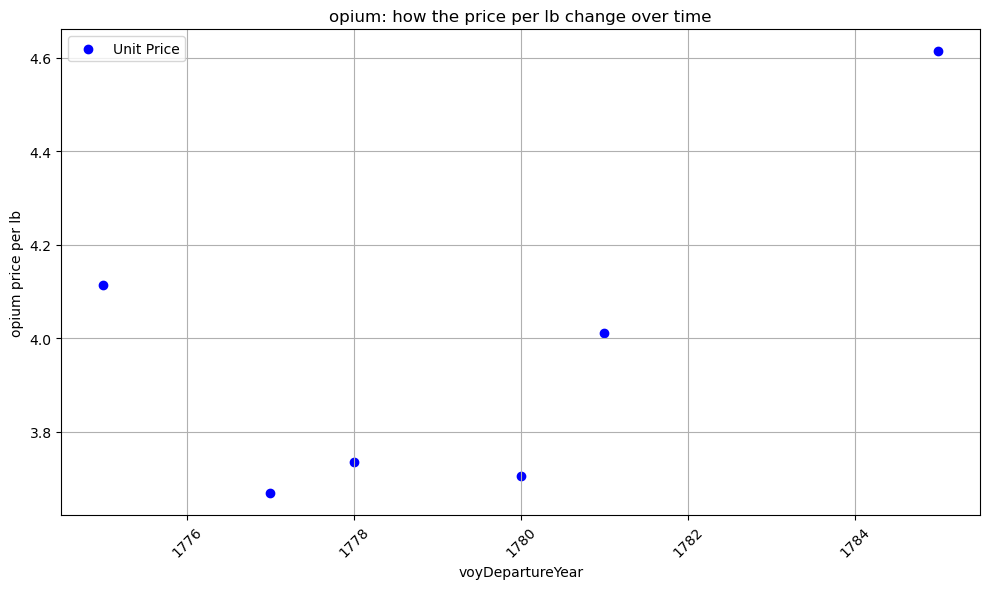

In [81]:
import matplotlib.pyplot as plt

# Convert 'unit_price' column to numeric type, handling errors and converting NaN values to None
#opium_lb['opium price per lb'] = pd.to_string(opium_lb['opium price per lb'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(opium_lb_filtered['voyDepartureYear'], opium_lb_filtered['opium price per lb'], marker='o', linestyle='-', color='b', label='Unit Price')
plt.title('opium: how the price per lb change over time')
plt.xlabel('voyDepartureYear')
plt.ylabel('opium price per lb')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [82]:
# we see above that the unit price was stable during 1777-1780, but it rised up after 1780

In [71]:
# calculate unit price (per kist)
opium['carUnit'] = opium['carUnit'].astype(str)
opium_kist=opium.loc[opium['carUnit'] == '67']
opium_kist

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/3164745002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opium['carUnit'] = opium['carUnit'].astype(str)


,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
1315,646995,99425,1142,659,67,500,500,"0,0,0",0,0,...,NaN,147.0,71,NaN,NaN,3106,3129,24,71 Batavia Batavia Bengalen 1790 1790 24 S...,Stralen
4625,649969,99730,1142,659,67,347,347,"218.421,15",218421,15,...,NaN,146.0,506,NaN,NaN,3106,3129,32,506 Batavia Batavia Bengalen 1787 1787 32 ...,Standvastigheid
6139,651496,99921,1142,659,67,2,2,"1.249,12,8",1249,12,...,NaN,146.0,549,NaN,NaN,3129,3082,82,549 Ceylon Batavia Batavia 1787 1787 82 Do...,Doggersbank
8435,653813,100058,1142,659,67,14,14,"11.344,90",11344,9,...,NaN,144.0,681,NaN,NaN,3115,3129,22,681 Batavia Batavia Malakka Malakka 1783 178...,Nepthum
9584,654899,100204,1142,659,67,2,2,1.584,1584,<NA>,...,NaN,144.0,827,NaN,NaN,3129,3082,50,827 Colombo Ceylon Batavia Batavia 1783 1783...,Ceres
31631,840705,115121,1142,19623,67,3,3,NaN,<NA>,<NA>,...,NaN,102.0,15700,NaN,The sum of the product-values is 3 guilders lo...,3129,3133,139,15700 Semarang Java's Noordoostkust Batavia Ba...,Stad Keulen
33188,678989,102975,1142,<NA>,67,299,299,"158.750,6,8",158750,6,...,NaN,136.0,3593,NaN,NaN,3106,3129,40,3593 Batavia Batavia Bengalen 1769 1769 40 ...,Vaillant
38912,718538,106563,1142,<NA>,67,1,1,NaN,<NA>,<NA>,...,NaN,127.0,7177,NaN,NaN,3129,3082,67,7177 Colombo Ceylon Batavia Batavia 1757 175...,Keukenhof
61579,740752,108669,1142,<NA>,67,2,2,"1.143,16",1143,16,...,NaN,154.0,9282,NaN,"Due to damage to this year's BGB journal, many...",3106,3082,200,9282 Ceylon Bengalen Due to damage to this y...,Triton
92029,771659,111502,1142,659,67,3.625,3625,NaN,<NA>,<NA>,...,NaN,116.0,12109,NaN,NaN,3106,3129,43,12109 Batavia Batavia Bengalen 1734 1735 43...,Cats


In [73]:
# Convert columns 'A' and 'B' to numeric type
opium_kist['carValueGuldens'] = pd.to_numeric(opium_kist['carValueGuldens'])
opium_kist['carQuantityNumeric'] = pd.to_numeric(opium_kist['carQuantityNumeric'])

# Create a new column 'C' by dividing 'A' by 'B'
opium_kist['opium price per kist'] = opium_kist['carValueGuldens'] / opium_kist['carQuantityNumeric']

# Display the updated DataFrame
opium_kist

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/154929455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opium_kist['carValueGuldens'] = pd.to_numeric(opium_kist['carValueGuldens'])
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/154929455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opium_kist['carQuantityNumeric'] = pd.to_numeric(opium_kist['carQuantityNumeric'])
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_84558/154929455.py:6: SettingWithCopyWa

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name,opium price per lb,opium price per kist
1315,646995,99425,1142,659,67,500,500,"0,0,0",0,0,...,71,NaN,NaN,3106,3129,24,71 Batavia Batavia Bengalen 1790 1790 24 S...,Stralen,0.0,0.0
4625,649969,99730,1142,659,67,347,347,"218.421,15",218421,15,...,506,NaN,NaN,3106,3129,32,506 Batavia Batavia Bengalen 1787 1787 32 ...,Standvastigheid,629.455331,629.455331
6139,651496,99921,1142,659,67,2,2,"1.249,12,8",1249,12,...,549,NaN,NaN,3129,3082,82,549 Ceylon Batavia Batavia 1787 1787 82 Do...,Doggersbank,624.5,624.5
8435,653813,100058,1142,659,67,14,14,"11.344,90",11344,9,...,681,NaN,NaN,3115,3129,22,681 Batavia Batavia Malakka Malakka 1783 178...,Nepthum,810.285714,810.285714
9584,654899,100204,1142,659,67,2,2,1.584,1584,<NA>,...,827,NaN,NaN,3129,3082,50,827 Colombo Ceylon Batavia Batavia 1783 1783...,Ceres,792.0,792.0
31631,840705,115121,1142,19623,67,3,3,NaN,<NA>,<NA>,...,15700,NaN,The sum of the product-values is 3 guilders lo...,3129,3133,139,15700 Semarang Java's Noordoostkust Batavia Ba...,Stad Keulen,<NA>,<NA>
33188,678989,102975,1142,<NA>,67,299,299,"158.750,6,8",158750,6,...,3593,NaN,NaN,3106,3129,40,3593 Batavia Batavia Bengalen 1769 1769 40 ...,Vaillant,530.936455,530.936455
38912,718538,106563,1142,<NA>,67,1,1,NaN,<NA>,<NA>,...,7177,NaN,NaN,3129,3082,67,7177 Colombo Ceylon Batavia Batavia 1757 175...,Keukenhof,<NA>,<NA>
61579,740752,108669,1142,<NA>,67,2,2,"1.143,16",1143,16,...,9282,NaN,"Due to damage to this year's BGB journal, many...",3106,3082,200,9282 Ceylon Bengalen Due to damage to this y...,Triton,571.5,571.5
92029,771659,111502,1142,659,67,3.625,3625,NaN,<NA>,<NA>,...,12109,NaN,NaN,3106,3129,43,12109 Batavia Batavia Bengalen 1734 1735 43...,Cats,<NA>,<NA>


In [83]:
opium_kist['opium price per kist'].value_counts()

0.0           1
629.455331    1
624.5         1
810.285714    1
792.0         1
530.936455    1
571.5         1
Name: opium price per kist, dtype: Int64

In [84]:
opium_kist['opium price per kist'].describe()

count      7.000000
mean     565.525357
std      270.744180
min        0.000000
25%      551.218227
50%      624.500000
75%      710.727666
max      810.285714
Name: opium price per kist, dtype: float64

In [85]:
# Drop rows with NaN values 
opium_kist_filtered=opium_kist.dropna(subset=['opium price per kist'])
opium_kist_filtered

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name,opium price per lb,opium price per kist
1315,646995,99425,1142,659,67,500,500,"0,0,0",0,0,...,71,NaN,NaN,3106,3129,24,71 Batavia Batavia Bengalen 1790 1790 24 S...,Stralen,0.0,0.0
4625,649969,99730,1142,659,67,347,347,"218.421,15",218421,15,...,506,NaN,NaN,3106,3129,32,506 Batavia Batavia Bengalen 1787 1787 32 ...,Standvastigheid,629.455331,629.455331
6139,651496,99921,1142,659,67,2,2,"1.249,12,8",1249,12,...,549,NaN,NaN,3129,3082,82,549 Ceylon Batavia Batavia 1787 1787 82 Do...,Doggersbank,624.5,624.5
8435,653813,100058,1142,659,67,14,14,"11.344,90",11344,9,...,681,NaN,NaN,3115,3129,22,681 Batavia Batavia Malakka Malakka 1783 178...,Nepthum,810.285714,810.285714
9584,654899,100204,1142,659,67,2,2,1.584,1584,<NA>,...,827,NaN,NaN,3129,3082,50,827 Colombo Ceylon Batavia Batavia 1783 1783...,Ceres,792.0,792.0
33188,678989,102975,1142,<NA>,67,299,299,"158.750,6,8",158750,6,...,3593,NaN,NaN,3106,3129,40,3593 Batavia Batavia Bengalen 1769 1769 40 ...,Vaillant,530.936455,530.936455
61579,740752,108669,1142,<NA>,67,2,2,"1.143,16",1143,16,...,9282,NaN,"Due to damage to this year's BGB journal, many...",3106,3082,200,9282 Ceylon Bengalen Due to damage to this y...,Triton,571.5,571.5


In [86]:
opium_kist_filtered['voyDepartureYear'].value_counts()

1787.0    1
1783.0    1
1774.0    1
Name: voyDepartureYear, dtype: int64

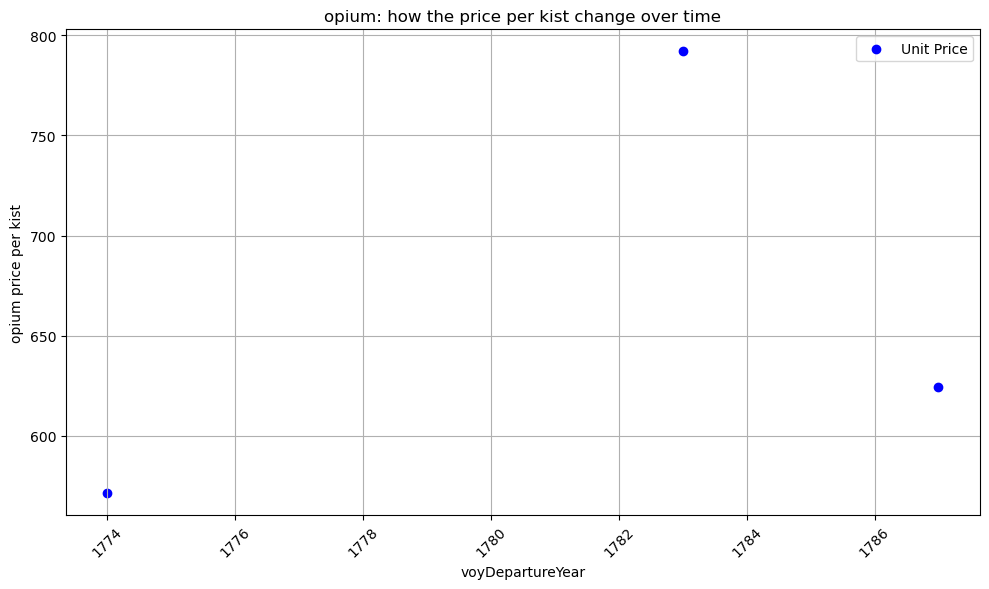

In [87]:
import matplotlib.pyplot as plt

# Convert 'unit_price' column to numeric type, handling errors and converting NaN values to None
#opium_lb['opium price per lb'] = pd.to_string(opium_lb['opium price per lb'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(opium_kist_filtered['voyDepartureYear'], opium_kist_filtered['opium price per kist'], marker='o', linestyle='-', color='b', label='Unit Price')
plt.title('opium: how the price per kist change over time')
plt.xlabel('voyDepartureYear')
plt.ylabel('opium price per kist')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()